### Is there a negative correlation between Wnt activation and AhR activation
As described in the paper "Intersection of AHR and Wnt Signaling in Development, Health, and Disease" by Andrew J. Schneider, Amanda M. Branam and Richard E. Peterson, a majority of studies found that activated AHR down regulated canonical Wnt signaling. IR GSCs exhibit higher AhR activation. Do they also exhibit lower Wnt activation?

In [8]:
import pandas as pd

# Read in gsva_results
gsva_results_df = pd.read_csv('C:/research/GSC_RNAseq_and_metabolomics_analysis/gsva_results.csv', index_col=0)

# Display the first few rows of each DataFrame to verify successful loading
print(gsva_results_df.iloc[:5, :5])


                     BT41_T    BT48_T    BT50_T    BT53_T    BT67_T
DEV_gs             0.121199 -0.044395  0.107647  0.092142 -0.306755
IR_gs             -0.124622  0.068298  0.009035 -0.188824  0.385338
AhR_activation_gs -0.072989  0.145668  0.209514 -0.005065  0.251873
Wnt_activation_gs -0.138055 -0.474027 -0.070369 -0.219989 -0.219492


First, I calculated the correlation between Wnt activation and AhR activation across all samples lines. There is a small negative correlation of -0.14 (p-value = 0.0409). The very small effect size may be because all the samples were lumped together. Stratifying by sample type may help. 

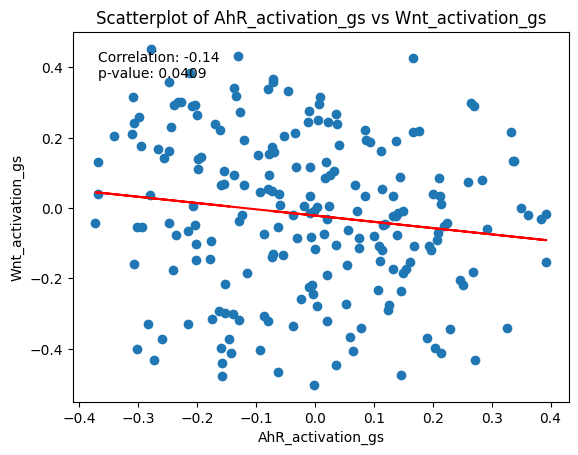

In [7]:
import matplotlib.pyplot as plt
import numpy as np

gsva_t = gsva_results_df.T
plt.scatter(gsva_t['AhR_activation_gs'], gsva_t['Wnt_activation_gs'])
plt.xlabel('AhR_activation_gs')
plt.ylabel('Wnt_activation_gs')
plt.title('Scatterplot of AhR_activation_gs vs Wnt_activation_gs')

# Line of best fit
m, b = np.polyfit(gsva_t['AhR_activation_gs'], gsva_t['Wnt_activation_gs'], 1)
plt.plot(gsva_t['AhR_activation_gs'], m * gsva_t['AhR_activation_gs'] + b, color='red')

# Correlation coefficient and p-value
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}\np-value: {p_value:.3g}', transform=plt.gca().transAxes, verticalalignment='top')

plt.show()


Looking at only adult GBM culture samples, there is a much stronger relationship. Correlation = -0.31 (p-value = 0.00359). There was no significant correlation when looking at only adult GBM tissue samples. This is likely because the tissue samples are hetergeneous. 

In [24]:
bulk_meta_df = pd.read_csv('bulk_meta_compiled.csv', index_col=0)
print(bulk_meta_df.head())

adult_gbm_culture_samples = bulk_meta_df[(bulk_meta_df['disease'] == 'adult_gbm') & (bulk_meta_df['sample_type'] == 'culture')].index.tolist()
print(adult_gbm_culture_samples)

adult_gbm_tissue_samples = bulk_meta_df[(bulk_meta_df['disease'] == 'adult_gbm') & (bulk_meta_df['sample_type'] == 'tissue')].index.tolist()
print(adult_gbm_tissue_samples)

               disease sample_type
sample_name                       
BT41_T       adult_gbm      tissue
BT48_T       adult_gbm      tissue
BT50_T       adult_gbm      tissue
BT53_T       adult_gbm      tissue
BT67_T       adult_gbm      tissue
['BT41_L', 'BT48_L', 'BT50_L', 'BT53_L', 'BT67_L', 'BT69_L', 'BT73_L', 'BT75_L', 'BT84_L', 'BT89_L', 'BT94_L', 'BT100_L', 'BT106_L', 'BT108_L', 'BT119_L', 'BT126_L', 'BT134_L', 'BT140_L', 'BT143_L', 'BT147_L', 'BT169_L', 'BT189_L', 'BT208_L', 'BT238_L', 'BT241_L', 'BT248_L', 'BT284_L', 'BT301_L', 'BT338_L', 'BT426_L', 'BT428_L', 'BT429_L', 'BT465_L', 'BT466_L', 'BT467_L', 'BT468_L', 'G361_L', 'G411_L', 'G489_L', 'G498_L', 'G523_L', 'G549_L', 'G551_L', 'G561_L', 'G564_L', 'G566_L', 'G567_L', 'G571_L', 'G577_L', 'G583_L', 'G584_L', 'G594_L', 'G613_L', 'G620_L', 'G637_L', 'G648_L', 'G683_L', 'G691_L', 'G702_L', 'G705_L', 'G706_L', 'G719_L', 'G729_L', 'G744_L', 'G789_L', 'G797_L', 'G799_L', 'G800_L', 'G809_L', 'G811_L', 'G823_L', 'G828_L', 'G837_L',

In [21]:
def plot_correlation(gsva_t_subset, title):
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import pearsonr

    x = gsva_t_subset['AhR_activation_gs']
    y = gsva_t_subset['Wnt_activation_gs']

    plt.scatter(x, y)
    plt.xlabel('AhR_activation_gs')
    plt.ylabel('Wnt_activation_gs')
    plt.title(title)

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red')

    corr, p_value = pearsonr(x, y)
    plt.text(0.05, 0.95, f'Correlation: {corr:.2f}\np-value: {p_value:.3g}',
             transform=plt.gca().transAxes, verticalalignment='top')

    plt.show()


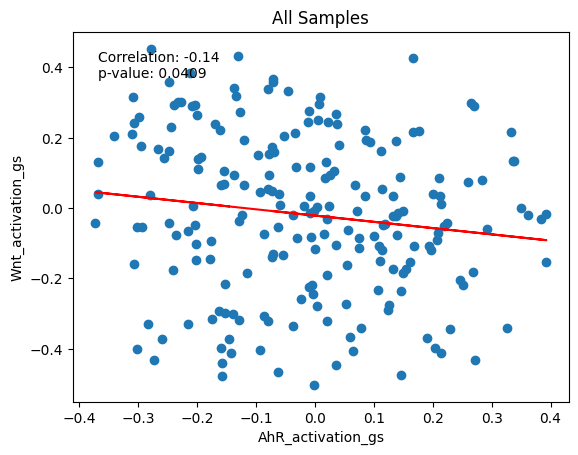

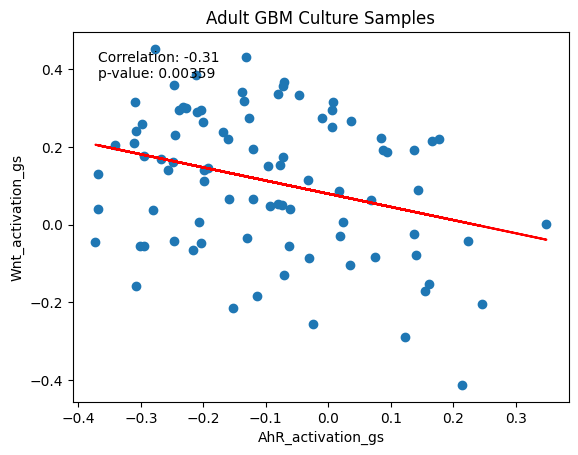

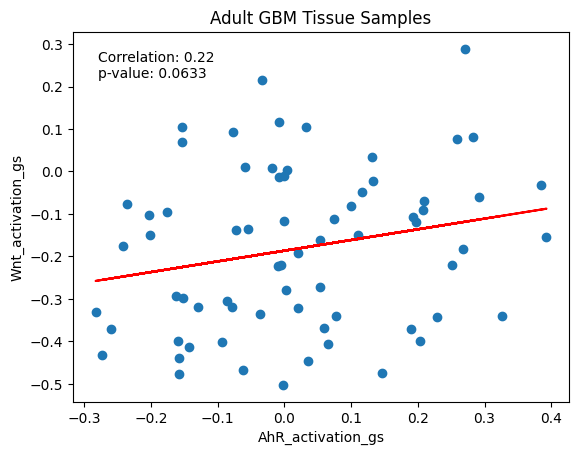

In [25]:
plot_correlation(gsva_t, "All Samples")
plot_correlation(gsva_t.loc[adult_gbm_culture_samples], "Adult GBM Culture Samples")
plot_correlation(gsva_t.loc[adult_gbm_tissue_samples], "Adult GBM Tissue Samples")

Next, I am curious, is there a correlation between Wnt activation and the IR GSC signature score? There is a moderate negative correlation between Wnt activation and the IR GSC signature.

Text(0.05, 0.95, 'Correlation: -0.47\np-value: 3.19e-06')

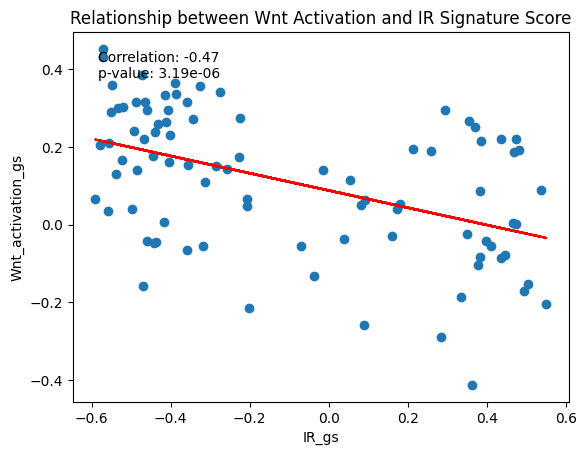

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

gsva_t_subset = gsva_t.loc[adult_gbm_culture_samples]

x = gsva_t_subset['IR_gs']
y = gsva_t_subset['Wnt_activation_gs']

plt.scatter(x, y)
plt.xlabel('IR_gs')
plt.ylabel('Wnt_activation_gs')
plt.title("Relationship between Wnt Activation and IR Signature Score")

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

corr, p_value = pearsonr(x, y)
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}\np-value: {p_value:.3g}',
            transform=plt.gca().transAxes, verticalalignment='top')